In [2]:
import pandas as pd

In [3]:
#SARIMA method
from statsmodels.tsa.arima.model import ARIMA

In [4]:
data = pd.read_csv('Retail_sales_of_electricity_United_States_monthly.csv',  index_col='Month', parse_dates=True)
data.head()

C:\Users\omord\AppData\Local\Temp\ipykernel_33756\3735436095.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv('Retail_sales_of_electricity_United_States_monthly.csv',  index_col='Month', parse_dates=True)


,all sectors million kilowatthours,residential million kilowatthours,commercial million kilowatthours,industrial million kilowatthours
Month,,,,
2023-12-01,341010.38748,142838.92146,114842.52383,82723.41953
2023-12-01,NaN,NaN,NaN,NaN
2023-12-01,NaN,NaN,NaN,NaN
2023-11-01,310959.15193,119052.47929,108918.04378,82426.92228
2023-10-01,293487.06424,102427.52221,107050.72376,83460.29819


In [5]:
data.dropna(inplace=True)

In [6]:
data.sort_index(inplace=True)

In [7]:
data.index.freq='MS'

In [8]:
train_data=data.iloc[:-12]
test_data=data.iloc[-12:]

<Axes: xlabel='Month'>

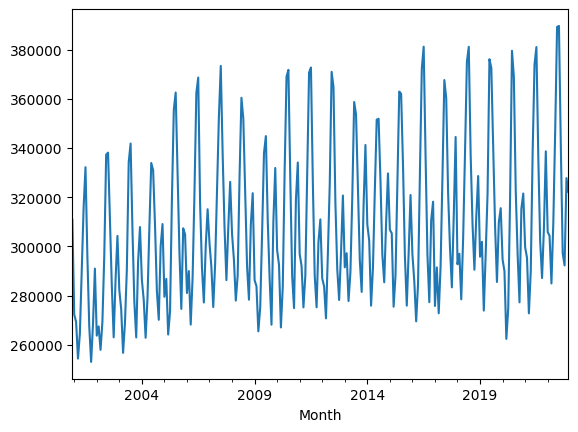

In [9]:
train_data['all sectors million kilowatthours'].plot()

In [32]:
current_model = ARIMA(train_data['all sectors million kilowatthours'],order=(2,1,2), seasonal_order=(2,1,2,12)).fit()
current_model.summary()
#has smallest AIC

C:\Users\omord\PycharmProjects\NTlabs7\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                       
=============================================================================================
Dep. Variable:     all sectors million kilowatthours   No. Observations:                  265
Model:                  ARIMA(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood               -2645.858
Date:                               Sun, 05 May 2024   AIC                           5309.715
Time:                                       10:33:33   BIC                           5341.480
Sample:                                   12-01-2000   HQIC                          5322.497
                                        - 12-01-2022                                         
Covariance Type:                                 opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3957      0.349     -1.134      0.257      -1.080       0.288
ar.L2          0.4549      0.407      1.118      0.264      -0.343       1.253
ma.L1          0.3218      0.350      0.918      0.358      -0.365       1.008
ma.L2         -0.5400      0.402     -1.343      0.179      -1.328       0.248
ar.S.L12       1.5823      0.096     16.399      0.000       1.393       1.771
ar.S.L24      -0.6589      0.058    -11.340      0.000      -0.773      -0.545
ma.S.L12      -1.8738      0.110    -17.089      0.000      -2.089      -1.659
ma.S.L24       0.9135      0.095      9.602      0.000       0.727       1.100
sigma2      7.976e+07   2.56e-09   3.11e+16      0.000    7.98e+07    7.98e+07
===================================================================================
Ljung-Box (L1) (Q):                   4.09   Jarque-Bera (JB):                 1.03
Prob(Q):                              0.04   Prob(JB):                         0.60
Heteroskedasticity (H):               1.16   Skew:                             0.04
Prob(H) (two-sided):                  0.49   Kurtosis:                         3.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.92e+32. Standard errors may be unstable.
"""

In [36]:
forecast=current_model.forecast(len(test_data)).rename('SARIMAX forecast')
forecast

2023-01-01    289888.886109
2023-02-01    289510.997120
2023-03-01    268846.415566
2023-04-01    292550.393117
2023-05-01    331621.466385
2023-06-01    374998.100087
2023-07-01    374760.751283
2023-08-01    327010.345084
2023-09-01    285408.931659
2023-10-01    276333.436233
2023-11-01    310680.338361
2023-12-01    308118.157986
Freq: MS, Name: SARIMAX forecast, dtype: float64

<Axes: xlabel='Month'>

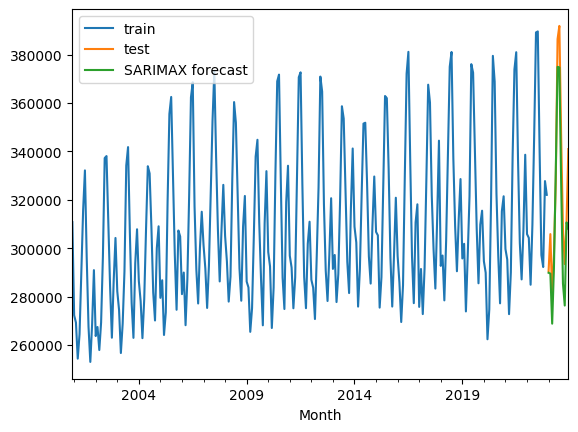

In [37]:
train_data['all sectors million kilowatthours'].plot(legend=True,label='train')
test_data['all sectors million kilowatthours'].plot(legend=True,label='test')
forecast.plot(legend=True, label='SARIMAX forecast')